In [1]:
#Load library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

##Load the dataset

In [2]:
#Load and split the dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
labels = ["airplane", "automobile", "bird",
          "cat", "deer", "dog", "frog", "horse", "ship", "truck"] #https://www.cs.toronto.edu/~kriz/cifar.html

##Exploratory Data Analysis

In [3]:
#Training and testing set dimensions
print(f"Training features: {train_images.shape}")
print(f"Training labels: {train_labels.shape}")
print(f"Testing features: {test_images.shape}")
print(f"Testing labels {test_labels.shape}")

Training features: (50000, 32, 32, 3)
Training labels: (50000, 1)
Testing features: (10000, 32, 32, 3)
Testing labels (10000, 1)


In [4]:
#Check data distribution
unique, counts = np.unique(test_labels, return_counts= True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

In [5]:
#Analysis data inside the traing images
print(f"Trainig image values: {train_images[0,0,0]}")
print(f"Testing image values: {train_labels[0]}")

Trainig image values: [59 62 63]
Testing image values: [6]


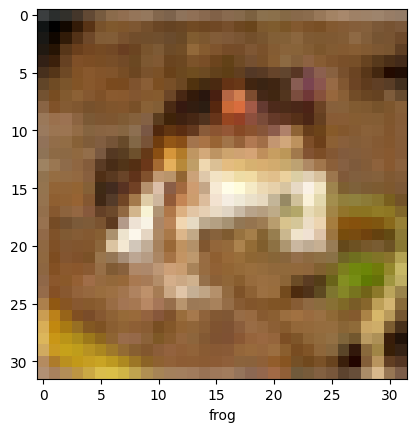

In [6]:
# Print the images
img_index = 0
plt.figure()
plt.imshow(train_images[img_index,:,:])
plt.xlabel(labels[train_labels[img_index][0]])
plt.show()

##Preprocessing

In [7]:
#Normalise datasets
train_images = train_images/255.0
test_images = test_images/255.0
train_images[20]

array([[[0.6       , 0.61568627, 0.60784314],
        [0.68235294, 0.70588235, 0.7372549 ],
        [0.60784314, 0.64705882, 0.6745098 ],
        ...,
        [0.47843137, 0.49019608, 0.48235294],
        [0.54117647, 0.56078431, 0.55294118],
        [0.38039216, 0.39607843, 0.38039216]],

       [[0.62745098, 0.63921569, 0.64705882],
        [0.64313725, 0.66666667, 0.70588235],
        [0.58823529, 0.62352941, 0.6627451 ],
        ...,
        [0.5372549 , 0.52941176, 0.50588235],
        [0.62745098, 0.63137255, 0.61568627],
        [0.40392157, 0.42745098, 0.41960784]],

       [[0.54901961, 0.56078431, 0.57647059],
        [0.57647059, 0.59607843, 0.65098039],
        [0.53333333, 0.56862745, 0.61960784],
        ...,
        [0.40784314, 0.40392157, 0.38823529],
        [0.49019608, 0.50196078, 0.49019608],
        [0.36470588, 0.4       , 0.39607843]],

       ...,

       [[0.68627451, 0.69411765, 0.70196078],
        [0.66666667, 0.6745098 , 0.68235294],
        [0.66666667, 0

In [8]:
train_images.shape[1:]

(32, 32, 3)

##ConvNet Model

In [9]:
#Create Convolutional neural network architecture (graph).
convnet_model = keras.Sequential()
convnet_model.add(keras.layers.Input(shape=train_images.shape[1:]))
convnet_model.add(keras.layers.Conv2D(filters= 32, kernel_size= (3,3), activation="relu"))
convnet_model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
convnet_model.add(keras.layers.Conv2D(filters= 64, kernel_size= (3,3), activation="relu"))
convnet_model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
convnet_model.add(keras.layers.Conv2D(filters= 64, kernel_size= (3,3), activation="relu"))

#Print the convnet architecture.
convnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [10]:
# Add the output layer to the Convnet
convnet_model.add(keras.layers.Flatten())
convnet_model.add(keras.layers.Dense(units= 64, activation="relu"))
convnet_model.add(keras.layers.Dense(units= 10))

#Print the finale architecture.
convnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
#Define the Convolutional Neural Network, optimiser, loss function and metrics
convnet_model.compile(
    optimizer= "adam",
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    metrics=["accuracy"],
)

In [12]:
#Train the Convnet model
history = convnet_model.fit(
    x= train_images,
    y= train_labels,
    epochs= 10,
    verbose= "auto",
    validation_split= 0.2,
)

Epoch 1/10
1250/1250 [==============================] - 74s 57ms/step - loss: 1.5718 - accuracy: 0.4254 - val_loss: 1.2730 - val_accuracy: 0.5427
Epoch 2/10
1250/1250 [==============================] - 60s 48ms/step - loss: 1.1950 - accuracy: 0.5777 - val_loss: 1.1291 - val_accuracy: 0.5963
Epoch 3/10
1250/1250 [==============================] - 59s 47ms/step - loss: 1.0492 - accuracy: 0.6312 - val_loss: 1.0037 - val_accuracy: 0.6462
Epoch 4/10
1250/1250 [==============================] - 55s 44ms/step - loss: 0.9423 - accuracy: 0.6692 - val_loss: 0.9557 - val_accuracy: 0.6693
Epoch 5/10
1250/1250 [==============================] - 56s 45ms/step - loss: 0.8650 - accuracy: 0.6979 - val_loss: 0.9076 - val_accuracy: 0.6866
Epoch 6/10
1250/1250 [==============================] - 55s 44ms/step - loss: 0.8067 - accuracy: 0.7180 - val_loss: 0.8886 - val_accuracy: 0.6941
Epoch 7/10
1250/1250 [==============================] - 59s 47ms/step - loss: 0.7596 - accuracy: 0.7334 - val_loss: 0.8964 -

In [13]:
#Print graph of convnet training loss and accuracy

def plot_history(history):
  plt.figure(figsize= (12, 8))
  plt.subplot(2,1,1)
  plt.plot(history["epochs"], history["loss"], label= "Training Loss", c="orange")
  plt.plot(history["epochs"], history["val_loss"], label= "Validation Loss", c="blue")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(2,1,2)
  plt.plot(history["epochs"], history["accuracy"], label= "Training Accuracy", c="orange")
  plt.plot(history["epochs"], history["val_accuracy"], label= "Validation Accuracy", c="blue")
  plt.ylim([0,1])
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()

In [14]:
hist = pd.DataFrame(history.history)
hist["epochs"] = history.epoch
hist.head()

,loss,accuracy,val_loss,val_accuracy,epochs
0,1.571809,0.425375,1.273045,0.5427,0
1,1.195028,0.577725,1.129133,0.5963,1
2,1.049198,0.631150,1.003742,0.6462,2
3,0.942338,0.669175,0.955687,0.6693,3
4,0.864971,0.697875,0.907635,0.6866,4


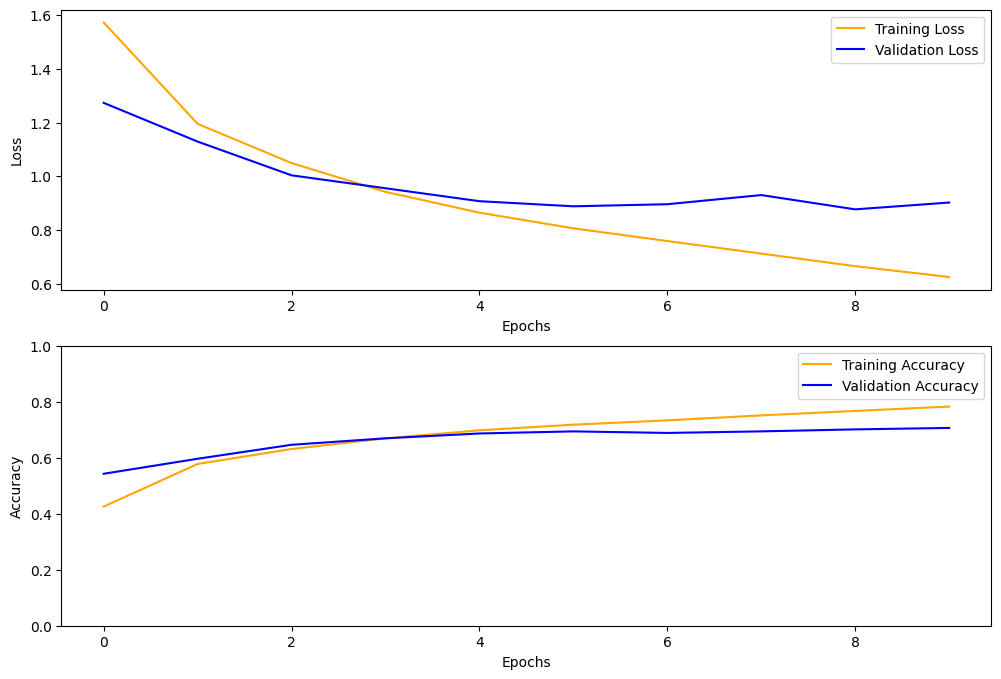

In [15]:
plot_history(hist)

An overfitting can be detected from the training/validation accuracy and loss.

In [16]:
#Test the Convulational Neural Network
test_loss, test_acc = convnet_model.evaluate(
    x= test_images,
    y= test_labels,
    verbose= 2,
)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 - 3s - loss: 0.9216 - accuracy: 0.6993 - 3s/epoch - 11ms/step
Test Loss: 0.9215685725212097
Test Accuracy: 0.6992999911308289


To decrease the overfitting, various option are possible such as train the model with a bigger datasets of diverses data (1) but to insure good performance, a pre-trained model can be use (2).

1: The library "ImageDataGenerator" to create new image from old images by compressing, rotating, streches and change the colors of the old images.
2: A pre-trained convolutional neural network, by Google team, of 1000 different classes trained on 1.4 million images.  

##PreTrained Model + Fine Tuning

In [17]:
#Create the model base (convolutional part) from the pre-trained model MObileNet V2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=train_images.shape[1:],
    include_top = False,
    weights= "imagenet",
)

# Freeze the base model, so the weight will not be modify during the training phase
base_model.trainable = False

#Print the model base architecture
base_model.summary()


9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 16, 16, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 16, 16, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReL

In [18]:
# Create the classifier part of the model

#The dimension of the output layers of the base model was bigger than (1,1, X), an average pooling layer will be a good choice to reduce its dimensions to 1
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

#The dimension of the output layers of the base model are (1,1, X), so flatten it is a good choice to reduce its dimension to 1.
flatten_layer = tf.keras.layers.Flatten()

#Add a prediction (Dense) layers of the size of the number of output possible
prediction_layer = tf.keras.layers.Dense(units = len(labels))


In [19]:
#Combine the base and the classifier
fine_tuning_model = tf.keras.Sequential(
    [
        base_model,
        global_average_layer,
        prediction_layer,
    ]
)

#Print the model base architecture
fine_tuning_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1, 1, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 10)                12810     
                                                                 
Total params: 2270794 (8.66 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [20]:
#Define model optimizer, loss function and metrics
base_learning_rate = 0.001
fine_tuning_model.compile(
    #optimizer= tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
    optimizer= "adam",
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    metrics= ["accuracy"],
)

In [21]:
#Train the model
n_epochs = 10

history_2 = fine_tuning_model.fit(
    x= train_images,
    y= train_labels,
    epochs = n_epochs,
    validation_split= 0.2,
    verbose= "auto",
)

Epoch 1/10
1250/1250 [==============================] - 53s 40ms/step - loss: 2.0775 - accuracy: 0.2688 - val_loss: 1.9730 - val_accuracy: 0.3078
Epoch 2/10
1250/1250 [==============================] - 49s 39ms/step - loss: 1.9467 - accuracy: 0.3062 - val_loss: 1.9239 - val_accuracy: 0.3207
Epoch 3/10
1250/1250 [==============================] - 48s 39ms/step - loss: 1.9140 - accuracy: 0.3112 - val_loss: 1.9062 - val_accuracy: 0.3208
Epoch 4/10
1250/1250 [==============================] - 49s 39ms/step - loss: 1.8984 - accuracy: 0.3161 - val_loss: 1.8964 - val_accuracy: 0.3248
Epoch 5/10
1250/1250 [==============================] - 48s 38ms/step - loss: 1.8893 - accuracy: 0.3181 - val_loss: 1.8918 - val_accuracy: 0.3257
Epoch 6/10
1250/1250 [==============================] - 47s 38ms/step - loss: 1.8830 - accuracy: 0.3205 - val_loss: 1.8895 - val_accuracy: 0.3243
Epoch 7/10
1250/1250 [==============================] - 51s 41ms/step - loss: 1.8788 - accuracy: 0.3196 - val_loss: 1.8883 -

In [22]:
#Convert dictionary into Dataframe
hist_2 = pd.DataFrame(history_2.history)
hist_2["epochs"] = history_2.epoch
hist_2.head()

,loss,accuracy,val_loss,val_accuracy,epochs
0,2.077490,0.268825,1.972980,0.3078,0
1,1.946673,0.306225,1.923949,0.3207,1
2,1.913996,0.311200,1.906212,0.3208,2
3,1.898375,0.316075,1.896380,0.3248,3
4,1.889260,0.318125,1.891829,0.3257,4


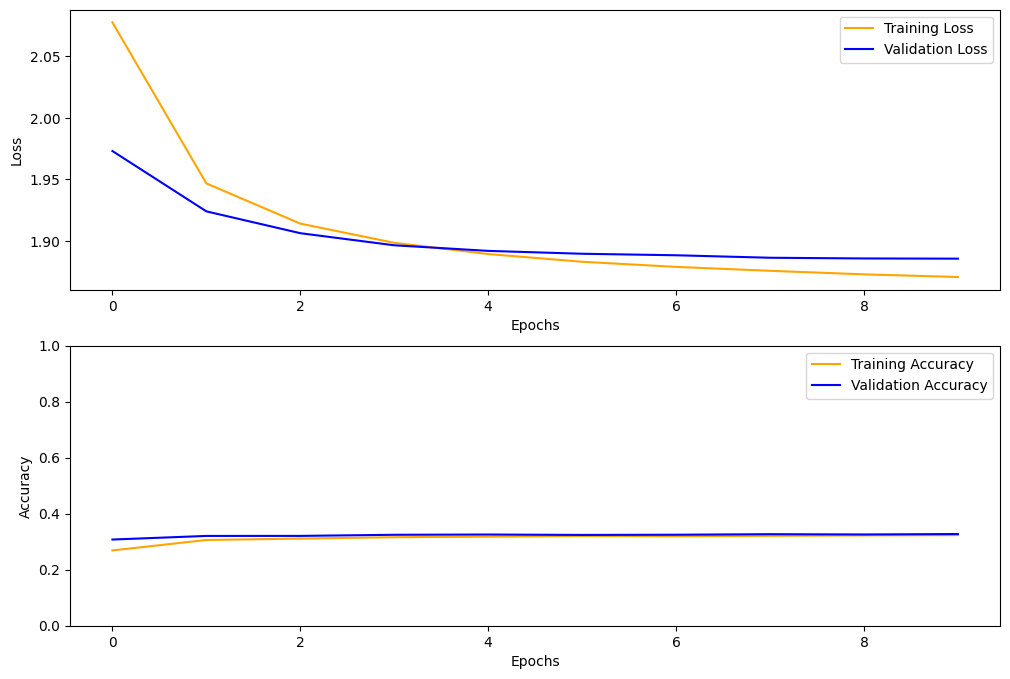

In [23]:
#Print the learning curve of the model
plot_history(hist_2)

In [24]:
#Test the pre-trained Convulational Neural Network
test_loss, test_acc = fine_tuning_model.evaluate(
    x= test_images,
    y= test_labels,
    verbose= 2,
)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

313/313 - 8s - loss: 1.8969 - accuracy: 0.3133 - 8s/epoch - 26ms/step
Test Loss: 1.8968545198440552
Test Accuracy: 0.3133000135421753


In [25]:
# Save the best model
convnet_model.save("cifar10_convnet.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##**Conclusion**

**The convnet model has a way better result (Accuracy: 70%) then the fine tuning model (Accuracy: 30%).**